In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
pd.options.mode.chained_assignment = None 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
fake_results = pd.read_csv('./Fake/fake_news_collection_scores1.csv')
real_results = pd.read_csv('./Real/real_news_collection_scores1.csv')

In [16]:
cols = list(fake_results.columns.values)

## Simple mean of (weighted) credibility scores for fake and real news

In [17]:
fake_results['credibility_score'].mean()

6.240840200558213

In [18]:
fake_results['credibility_score_weighted']*=10
fake_results['credibility_score_weighted'].mean()

6.540821766174907

In [19]:
real_results['credibility_score'].mean()

6.733972286218182

In [20]:
real_results['credibility_score_weighted']*=10
real_results['credibility_score_weighted'].mean()

7.173312764336098

## Median of same score

In [21]:
fake_results['credibility_score'].median()

6.21363463165944

In [22]:
fake_results['credibility_score_weighted'].median()

6.54228093715507

In [23]:
real_results['credibility_score'].median()

6.76064213564214

In [24]:
real_results['credibility_score_weighted'].median()

7.19167202205425

(array([0, 1, 2, 3]),
 [Text(0, 0, 'mean_score'),
  Text(1, 0, 'median_score'),
  Text(2, 0, 'mean_weighted_score'),
  Text(3, 0, 'median_weighted_score')])

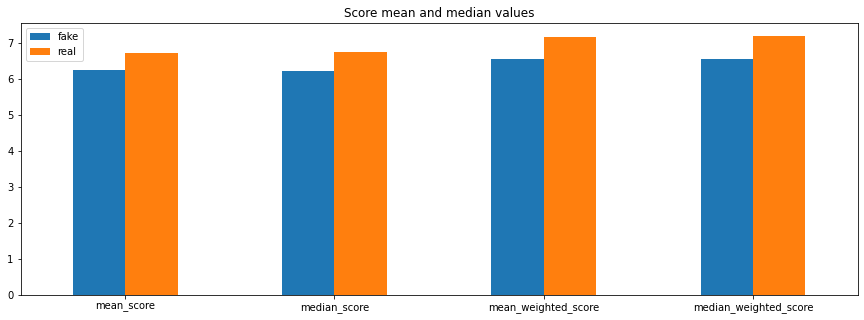

In [25]:
mean_median_scores = {'fake': [6.240840200558213, 6.21363463165944, 6.540821766174907, 6.54228093715507], 
                      'real': [6.733972286218182, 6.76064213564214, 7.173312764336098, 7.19167202205425]}

mean_median = pd.DataFrame(data=mean_median_scores, index=['mean_score', 'median_score', 'mean_weighted_score', 'median_weighted_score'])

mean_median.plot(y=["fake", "real"], kind="bar", figsize=(15, 5))
plt.title('Score mean and median values')
plt.xticks(rotation='horizontal')

## Comparing subscores for real and fake news

(array([0, 1, 2, 3]),
 [Text(0, 0, 'score_formality'),
  Text(1, 0, 'score_neutrality'),
  Text(2, 0, 'score_transparency'),
  Text(3, 0, 'score_layout')])

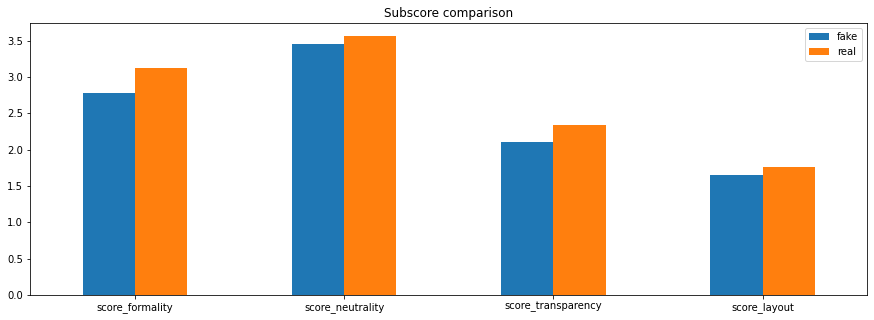

In [26]:
fake_results_subscores = fake_results[['score_formality', 'score_neutrality', 'score_transparency', 'score_layout']]
real_results_subscores = real_results[['score_formality', 'score_neutrality', 'score_transparency', 'score_layout']]

mean_subscores = pd.DataFrame([fake_results_subscores.mean()], index=['fake']).transpose()
mean_subscores_real = pd.DataFrame([real_results_subscores.mean()], index=['real']).transpose()
mean_subscores['real'] = mean_subscores_real

mean_subscores.plot(y=["fake", "real"], kind="bar", figsize=(15, 5))
plt.title('Subscore comparison')

plt.xticks(rotation='horizontal')

In [27]:
mean_subscores['diff'] = (mean_subscores['real'] - mean_subscores['fake'])/4
mean_subscores

,fake,real,diff
score_formality,2.782259,3.119760,0.084375
score_neutrality,3.452225,3.561662,0.027359
score_transparency,2.103035,2.334162,0.057782
score_layout,1.647826,1.758772,0.027736


## Comparing subsubscores for real and fake news

In [28]:
fake_results_subsubscores = fake_results[['form_score_spelling', 'form_score_punctuation', 'form_score_capitalization', 'form_score_complexity', 
                             'neut_score_superlatives', 'neut_score_emotional', 'neut_score_banned', 'neut_score_slurs', 
                             'tran_score_citations', 'tran_score_external_references', 'tran_score_broken_links', 'tran_score_author', 
                             'lay_score_photos', 'lay_score_video', 'lay_score_font_size', 'lay_score_font_type']]

In [29]:
real_results_subsubscores = real_results[['form_score_spelling', 'form_score_punctuation', 'form_score_capitalization', 'form_score_complexity', 
                             'neut_score_superlatives', 'neut_score_emotional', 'neut_score_banned', 'neut_score_slurs', 
                             'tran_score_citations', 'tran_score_external_references', 'tran_score_broken_links', 'tran_score_author', 
                             'lay_score_photos', 'lay_score_video', 'lay_score_font_size', 'lay_score_font_type']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'form_score_spelling'),
  Text(1, 0, 'form_score_punctuation'),
  Text(2, 0, 'form_score_capitalization'),
  Text(3, 0, 'form_score_complexity'),
  Text(4, 0, 'neut_score_superlatives'),
  Text(5, 0, 'neut_score_emotional'),
  Text(6, 0, 'neut_score_banned'),
  Text(7, 0, 'neut_score_slurs'),
  Text(8, 0, 'tran_score_citations'),
  Text(9, 0, 'tran_score_external_references'),
  Text(10, 0, 'tran_score_broken_links'),
  Text(11, 0, 'tran_score_author'),
  Text(12, 0, 'lay_score_photos'),
  Text(13, 0, 'lay_score_video'),
  Text(14, 0, 'lay_score_font_size'),
  Text(15, 0, 'lay_score_font_type')])

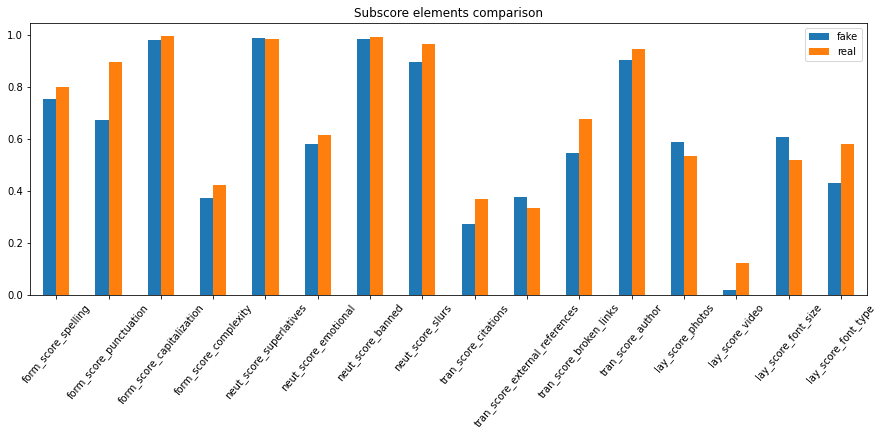

In [30]:
mean_scores = pd.DataFrame([fake_results_subsubscores.mean()], index=['fake']).transpose()
mean_scores_real = pd.DataFrame([real_results_subsubscores.mean()], index=['real']).transpose()
mean_scores['real'] = mean_scores_real

mean_scores.plot(y=["fake", "real"], kind="bar", figsize=(15, 5))
plt.title('Subscore elements comparison')
plt.xticks(rotation=50)

In [31]:
mean_scores['diff'] = ((mean_scores['real'] - mean_scores['fake'])*100)
mean_scores = mean_scores.sort_values(by='diff')
mean_scores

,fake,real,diff
lay_score_font_size,0.608696,0.520468,-8.822782
lay_score_photos,0.589130,0.533626,-5.550470
tran_score_external_references,0.378662,0.336470,-4.219155
neut_score_superlatives,0.988505,0.987124,-0.138056
neut_score_banned,0.986304,0.992329,0.602548
form_score_capitalization,0.983853,0.997272,1.341871
neut_score_emotional,0.581764,0.617296,3.553164
tran_score_author,0.904348,0.947368,4.302059
form_score_spelling,0.754118,0.801240,4.712178
form_score_complexity,0.372371,0.425053,5.268226


## Distribution of (weighted) credibility score for fake and real news

Text(0.5, 1.0, 'Distribution of credibility score for fake news')

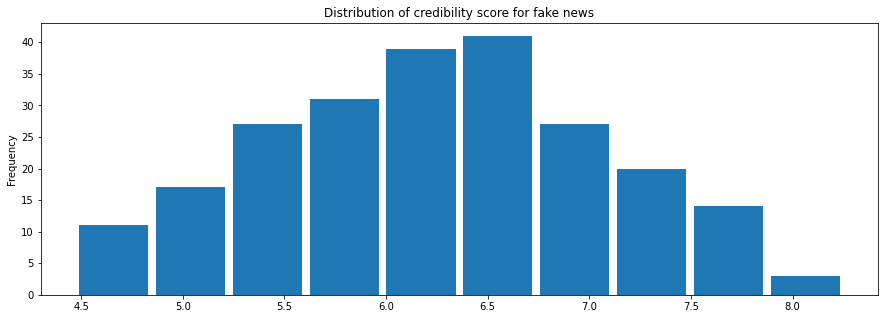

In [41]:
fake_results_cred = fake_results[['credibility_score', 'credibility_score_weighted']]

fake_results_cred['credibility_score'].plot(kind='hist', bins=10, figsize=(15, 5), rwidth=0.9)
plt.title('Distribution of credibility score for fake news')

Text(0.5, 1.0, 'Distribution of credibility score for real news')

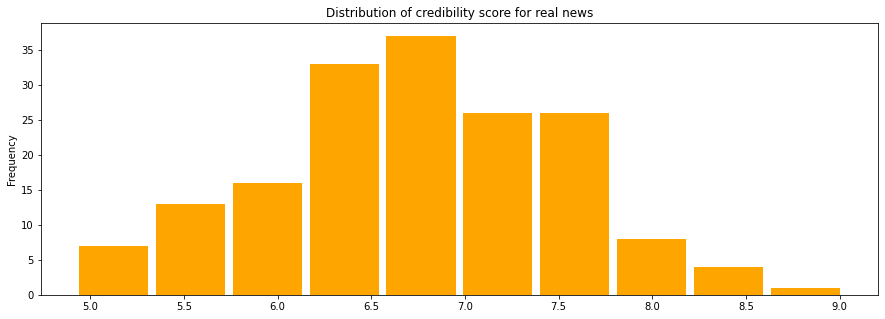

In [42]:
real_results_cred = real_results[['credibility_score', 'credibility_score_weighted']]

real_results_cred['credibility_score'].plot(kind='hist', bins=10, figsize=(15, 5), color='orange', rwidth=0.9)
plt.title('Distribution of credibility score for real news')

Text(0.5, 1.0, 'Distribution of weighted credibility score for fake news')

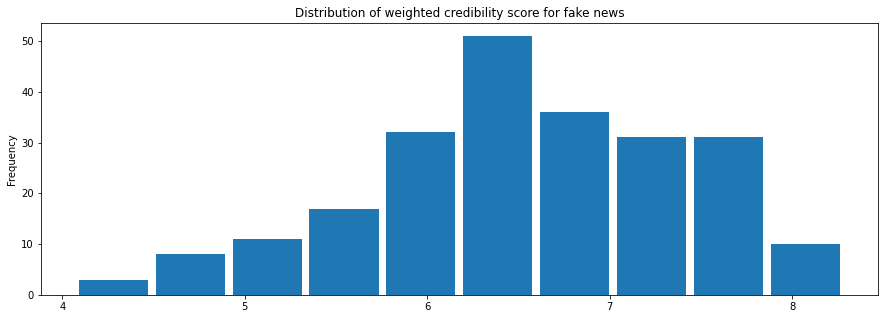

In [36]:
fake_results_cred['credibility_score_weighted'].plot(kind='hist',bins=10, figsize=(15, 5), rwidth=0.9)
plt.title('Distribution of weighted credibility score for fake news')

Text(0.5, 1.0, 'Distribution of weighted credibility score for real news')

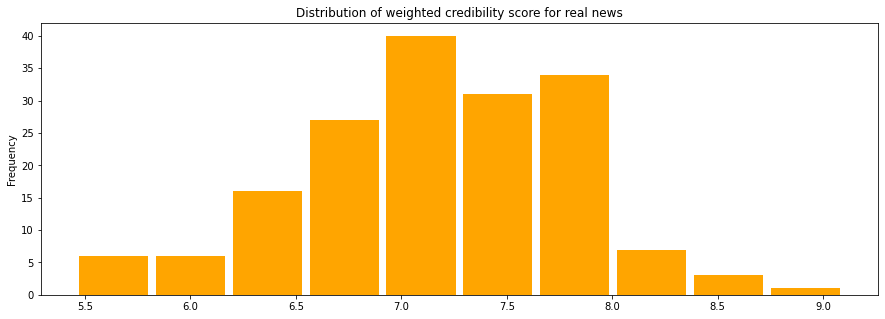

In [37]:
real_results_cred['credibility_score_weighted'].plot(kind='hist', bins=10, figsize=(15, 5), color='orange', rwidth=0.9)
plt.title('Distribution of weighted credibility score for real news')

In [ ]:
fake_results['score_formality'].plot(kind='hist', bins=10, figsize=(15, 5))
plt.title('Distribution of formality score for fake news')

In [ ]:
real_results['score_formality'].plot(kind='hist', bins = 10, figsize=(15, 5), color='orange')
plt.title('Distribution of formality score for real news')

In [ ]:
fake_results['score_neutrality'].plot(kind='hist', bins=10, figsize=(15, 5))
plt.title('Distribution of neutrality score for fake news')

In [ ]:
real_results['score_neutrality'].plot(kind='hist', bins = 10, figsize=(15, 5), color='orange')
plt.title('Distribution of neutrality score for real news')

In [6]:
fake_results['score_transparency'].plot(kind='hist', bins=10, figsize=(15, 5))
plt.title('Distribution of transparency score for fake news')

NameError: name 'fake_results' is not defined

In [ ]:
real_results['score_transparency'].plot(kind='hist', bins = 10, figsize=(15, 5), color='orange')
plt.title('Distribution of transparency score for real news')

In [ ]:
fake_results['score_layout'].plot(kind='hist', bins=10, figsize=(15, 5))
plt.title('Distribution of layout score for fake news')

In [ ]:
real_results['score_layout'].plot(kind='hist', bins = 10, figsize=(15, 5), color='orange')
plt.title('Distribution of layout score for real news')

In [ ]:
fake_results['form_score_punctuation'].plot(kind='hist', bins = 10, figsize=(15, 5))
plt.title('Distribution of the punctuation subscore for fake news')

In [ ]:
real_results['form_score_punctuation'].plot(kind='hist', bins = 10, figsize=(15, 5), color='orange')
plt.title('Distribution of the punctuation subscore for real news')

In [ ]:
fake_results['form_score_complexity'].plot(kind='hist', bins = 10, figsize=(15, 5))
plt.title('Distribution of the complexity subscore for fake news')

In [ ]:
real_results['form_score_complexity'].plot(kind='hist', bins = 10, figsize=(15, 5), color='orange')
plt.title('Distribution of the complexity subscore for real news')

In [7]:
fake_results_cred['diff'] = fake_results_cred['credibility_score_weighted'] - fake_results_cred['credibility_score']

for diff in fake_results_cred['diff']:
    if diff > 1:
        print(diff)

NameError: name 'fake_results_cred' is not defined

In [ ]:
real_results_cred['diff'] = real_results_cred['credibility_score_weighted'] - real_results_cred['credibility_score']

for diff in real_results_cred['diff']:
    if diff > 1:
        print(diff)

## Adding domain column to dataframes

In [ ]:
m = fake_results['url'].str.extract('(?<=http://)(.*?)(?=/)|(?<=https://)(.*?)(?=/)')
m = m[0].fillna(m[1]).fillna(fake_results['url'])

fake_results['domain'] = m

n = real_results['url'].str.extract('(?<=http://)(.*?)(?=/)|(?<=https://)(.*?)(?=/)')
n = n[0].fillna(n[1]).fillna(real_results['url'])

real_results['domain'] = n

fake_results = fake_results[['domain', 'url', 'credibility_score', 'credibility_score_weighted', 'score_formality', 
                             'score_neutrality', 'score_transparency', 'score_layout', 'form_score_spelling', 
                             'form_score_punctuation', 'form_score_capitalization', 'form_score_complexity', 
                             'neut_score_superlatives', 'neut_score_emotional', 'neut_score_banned', 'neut_score_slurs', 
                             'tran_score_citations', 'tran_score_external_references', 'tran_score_broken_links', 'tran_score_author', 
                             'lay_score_photos', 'lay_score_video', 'lay_score_font_size', 'lay_score_font_type']]
real_results = real_results[['domain', 'url', 'credibility_score', 'credibility_score_weighted', 'score_formality', 
                             'score_neutrality', 'score_transparency', 'score_layout', 'form_score_spelling', 
                             'form_score_punctuation', 'form_score_capitalization', 'form_score_complexity', 
                             'neut_score_superlatives', 'neut_score_emotional', 'neut_score_banned', 'neut_score_slurs', 
                             'tran_score_citations', 'tran_score_external_references', 'tran_score_broken_links', 'tran_score_author', 
                             'lay_score_photos', 'lay_score_video', 'lay_score_font_size', 'lay_score_font_type']]

## Top 5 and Flop 5 for both fake and real news

In [ ]:
fake_results.nlargest(5, 'credibility_score')

In [ ]:
fake_results.nsmallest(5, 'credibility_score')

In [8]:
real_results.nlargest(5, 'credibility_score')

NameError: name 'real_results' is not defined

In [ ]:
real_results.nsmallest(5, 'credibility_score')

## Looking for correlations between subscores

In [ ]:
ax1 = real_results_subsubscores.plot.scatter(x='tran_score_citations', y='tran_score_external_references', c='DarkBlue')

In [9]:
for var1 in real_results_subsubscores: 
    for var2 in real_results_subsubscores:
        if var1 != var2:
            ax1 = real_results_subsubscores.plot.scatter(x=var1, y=var2, c='DarkBlue')

NameError: name 'real_results_subsubscores' is not defined


## Score distribution

In [ ]:
ax = fake_results['credibility_score'].plot.kde(figsize=(15, 8))
plt.xticks([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9])

In [10]:
ax = real_results['credibility_score'].plot.kde(figsize=(15, 8))
plt.xticks([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9])

NameError: name 'real_results' is not defined

In [ ]:
ax = fake_results['credibility_score_weighted'].plot.kde(figsize=(15, 8))
plt.xticks([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9])

In [ ]:
ax = real_results['credibility_score_weighted'].plot.kde(figsize=(15, 8))
plt.xticks([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9])

In [ ]:
count = 0

for score in fake_results_subscores['score_layout']:
    if 4 > score >= 3:
        #print(score)
        count+=1

print(count/230)

In [ ]:
count = 0

for score in real_results_subscores['score_layout']:
    if 4 > score >= 3:
        #print(score)
        count+=1

print(count/171)

In [ ]:
count = 0

for score in real_results_subsubscores['lay_score_video']:
    if score==1:
        #print(score)
        count+=1

print(count)
print(25/401)

In [11]:
real_results_subsubscores['neut_score_emotional'].mean()

NameError: name 'real_results_subsubscores' is not defined

In [ ]:
fake_results.groupby('domain')['credibility_score_weighted'].mean().sort_values()

In [12]:
fake_results

NameError: name 'fake_results' is not defined